In [2]:
# An Introduction to Statical Learning
# 3 Linear Regression
# Excercises - Applied

In [3]:
import pandas as pd
import numpy as np

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
boston = sm.datasets.get_rdataset('Boston', 'MASS')

In [6]:
print(boston.__doc__)

====== ===============
Boston R Documentation
====== ===============

Housing Values in Suburbs of Boston
-----------------------------------

Description
~~~~~~~~~~~

The ``Boston`` data frame has 506 rows and 14 columns.

Usage
~~~~~

::

   Boston

Format
~~~~~~

This data frame contains the following columns:

``crim``
   per capita crime rate by town.

``zn``
   proportion of residential land zoned for lots over 25,000 sq.ft.

``indus``
   proportion of non-retail business acres per town.

``chas``
   Charles River dummy variable (= 1 if tract bounds river; 0
   otherwise).

``nox``
   nitrogen oxides concentration (parts per 10 million).

``rm``
   average number of rooms per dwelling.

``age``
   proportion of owner-occupied units built prior to 1940.

``dis``
   weighted mean of distances to five Boston employment centres.

``rad``
   index of accessibility to radial highways.

``tax``
   full-value property-tax rate per \\$10,000.

``ptratio``
   pupil-teacher ratio by town.



In [7]:
boston.data 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [8]:
boston.data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [9]:
dboston = boston.data

In [10]:
dboston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [11]:
dboston.tail(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1


<AxesSubplot:>

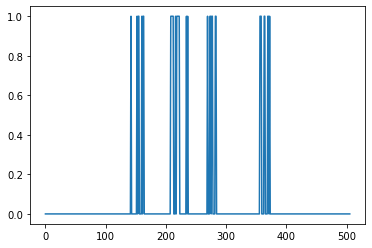

In [12]:
dboston["chas"].plot()

## Simple Linear Regression

medv =  B*lstat + e

In [13]:
from sklearn import linear_model

In [14]:
reg = linear_model.LinearRegression()

In [15]:
x = dboston['lstat'].values.reshape(-1, 1)

In [16]:
y = dboston['medv'].values.reshape(-1, 1)

In [17]:
reg.fit(x,y)

LinearRegression()

In [18]:
reg.coef_

array([[-0.95004935]])

In [19]:
reg.intercept_

array([34.55384088])

In [20]:
x

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [21]:
reg.predict([[16]])

array([[19.35305122]])

In [22]:
print(reg)

LinearRegression()


In [23]:
X2 = sm.add_constant(x)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           5.08e-88
Time:                        19:42:25   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

In [24]:
a,b,c = reg.predict([[5],[10],[15]])
print("      fit       lwr(2.5%)     upr(97.5%)")
print(a, a*0.974, a*1.025)
print(b, b*0.974, b*1.025)
print(c, c*0.974, c*1.025)

      fit       lwr(2.5%)     upr(97.5%)
[29.80359411] [29.02870066] [30.54868396]
[25.05334734] [24.40196031] [25.67968103]
[20.30310057] [19.77521996] [20.81067809]


In [25]:
print(dir(est2))

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', '_HCCM', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abat_diagonal', '_cache', '_data_attr', '_data_in_cache', '_get_robustcov_results', '_is_nested', '_use_t', '_wexog_singular_values', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid'

In [26]:
est2.conf_int()

array([[33.44845704, 35.65922472],
       [-1.0261482 , -0.87395051]])

In [27]:
a,b,c  = est2.predict([[1,5],[1,10],[1,15]])
print("      fit               lwr(2.5%)         upr(97.5%)")
print(a, a*0.975, a*1.025)
print(b, b*0.975, b*1.025)
print(c, c*0.975, c*1.025)

      fit               lwr(2.5%)         upr(97.5%)
29.803594110593128 29.0585042578283 30.548683963357952
25.053347341803175 24.427013658258094 25.679681025348252
20.303100573013218 19.795523058687888 20.810678087338548


In [28]:
est2.get_prediction([1,5]).conf_int()

array([[29.00741194, 30.59977628]])

In [29]:
est2.get_prediction([[1,5],[1,10],[1,15]]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


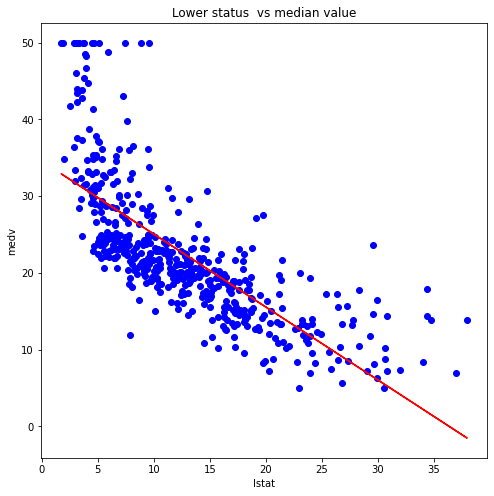

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, 'bo')
ax.plot(x, est2.predict(),color='red')
ax.set(title="Lower status  vs median value",
      xlabel="lstat",
      ylabel="medv");




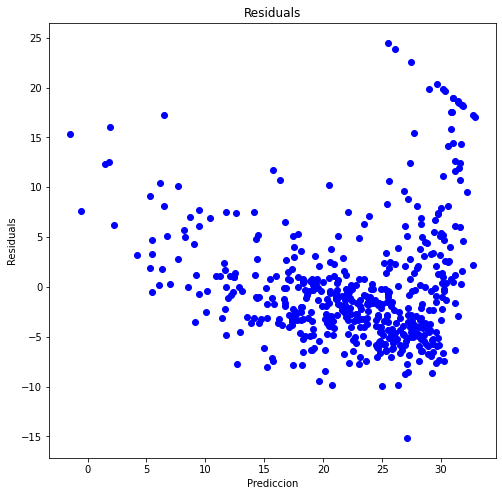

In [31]:
fig, ax = plt.subplots(figsize = (8, 8))
x1 = est2.predict();
y1 = est2.resid
ax.plot(x1, y1, 'bo')
ax.set(title="Residuals",
      xlabel="Prediccion",
      ylabel="Residuals");


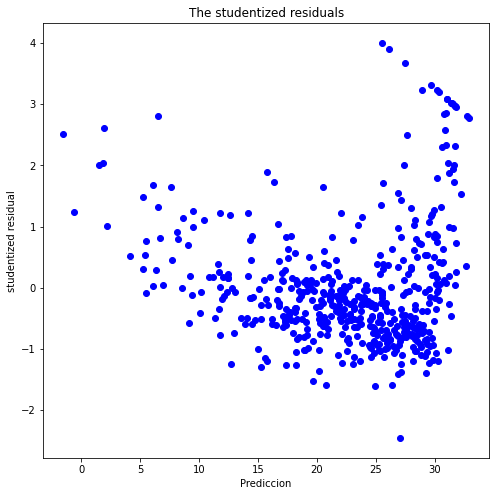

In [32]:
 influence = est2.get_influence()  
resid_student = influence.resid_studentized_external

fig, ax = plt.subplots(figsize = (8, 8))
x1 = est2.predict();

ax.plot(x1, resid_student, 'bo')
ax.set(title="The studentized residuals",
      xlabel="Prediccion",
      ylabel="studentized residual");

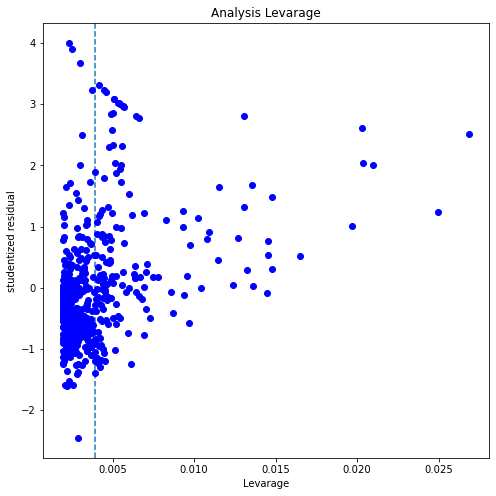

In [33]:
influence = est2.get_influence()  
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize = (8, 8))
plt.axvline(2/506, linestyle="--")

ax.plot(leverage, resid_student, 'bo')
ax.set(title="Analysis Levarage",
      xlabel="Levarage",
      ylabel="studentized residual");

In [34]:
import numpy as np
np.max(leverage)

0.026865166510283478

## Multiple Linear Regression

In [35]:
# x1 = sm.add_constant(dboston[['lstat', 'age']])
# y1 = dboston['medv'].values.reshape(-1, 1)
# est = sm.OLS(y, x1)
# est2 = est.fit()
# print(est2.summary())

##Otra forma de hacerlo

est = ols("medv ~ lstat + age", data= dboston)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           2.98e-88
Time:                        19:42:33   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [36]:
# Evaluating all variables 
x1 = sm.add_constant(dboston.drop(['medv'], axis=1))
y1 = dboston['medv'].values.reshape(-1, 1)

est = sm.OLS(y, x1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        19:42:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

## Interaction Term

In [37]:


# n = dboston[['lstat']].values*dboston[[ 'age']].values
# m = dboston[['lstat', 'age']].copy()
# m["lstat*age"]  = n
# x1 = sm.add_constant(m)
# y1 = dboston['medv'].values.reshape(-1, 1)
# est = sm.OLS(y, x1)
# est2 = est.fit()
# print(est2.summary())


est = ols("medv ~ lstat * age", data= dboston)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           4.86e-88
Time:                        19:42:34   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## Non-Linear Transformation of the Predictors

In [38]:
# Cuadratic 

# n = dboston[['lstat']].values**2
# m = dboston[['lstat']].copy()
# m["lstat^2"]  = n
# x1 = sm.add_constant(m)
# y1 = dboston['medv'].values.reshape(-1, 1)
# est = sm.OLS(y1, x1)
# est2 = est.fit()
# print(est2.summary())

#Segunda forma 

est = ols("medv ~ lstat + I(lstat **2)", data= dboston)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          1.56e-112
Time:                        19:42:34   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

In [39]:
# Model Comparison (using ANOVA)
est = ols("medv ~ lstat", data= dboston)
est3 = est.fit()
sm.stats.anova_lm(est3, est2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


In [40]:
# Polynomial de grado 5

# Primera forma 

# stri = ''
# for i in range(5):
#     if i==0:
#         stri+='lstat'
#     else:
#         stri+=' + I(lstat**'+ str(i+1) + ") "
    
# stri = "medv ~ " + stri
# est = ols(stri, data= dboston)
# est3 = est.fit()
# print(est3.summary())

# Segunda Forma

# est = ols("medv ~ lstat + I(lstat **2) + I(lstat **3) + I(lstat **4) + I(lstat **5)   ", data= dboston)
# est2 = est.fit()
# print(est2.summary())

# Tercera forma por orotogonal QR

def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha


x1= dboston[['lstat']].copy()
x1 = sm.add_constant(ortho_poly_fit(x1.values,5)[0][:,1:])
y1 = dboston['medv'].values.reshape(-1, 1)
est = sm.OLS(y1, x1)
est2 = est.fit()
print(est2.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          8.73e-122
Time:                        19:42:35   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.232     97.197      0.0

In [41]:
## Logaritmica

import numpy as np
est = ols("medv ~ np.log(lstat) ", data= dboston)
est3 = est.fit()
print(est3.summary())

#Segunda forma

# m= dboston[['lstat']].copy()
# n= np.log(m)
    
# x1 = sm.add_constant(n)
# y1 = dboston['medv'].values.reshape(-1, 1)
# est = sm.OLS(y1, x1)
# est2 = est.fit()
# print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          9.28e-122
Time:                        19:42:36   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004

## Qualitive Predictors

In [42]:
carseats = sm.datasets.get_rdataset('Carseats', 'ISLR')

In [43]:
print(carseats.__doc__)

======== ===============
Carseats R Documentation
======== ===============

Sales of Child Car Seats
------------------------

Description
~~~~~~~~~~~

A simulated data set containing sales of child car seats at 400
different stores.

Usage
~~~~~

::

   Carseats

Format
~~~~~~

A data frame with 400 observations on the following 11 variables.

``Sales``
   Unit sales (in thousands) at each location

``CompPrice``
   Price charged by competitor at each location

``Income``
   Community income level (in thousands of dollars)

``Advertising``
   Local advertising budget for company at each location (in thousands
   of dollars)

``Population``
   Population size in region (in thousands)

``Price``
   Price company charges for car seats at each site

``ShelveLoc``
   A factor with levels ``Bad``, ``Good`` and ``Medium`` indicating the
   quality of the shelving location for the car seats at each site

``Age``
   Average age of the local population

``Education``
   Education level at each 

In [44]:
dcarseats = carseats.data

In [45]:
dcarseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [46]:
dcarseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [47]:
# Evaluating all variables 
m = dcarseats.drop(['Sales'], axis=1) 
m['Income*Advertising'] = dcarseats['Income']*dcarseats['Advertising']
m['Price*Age'] = dcarseats['Price']*dcarseats['Age']
# Obtiene los dummies de las variables cualitativas para k niveles, de k-1 niveles (por drop_first=True)
n = pd.get_dummies(m, columns=['ShelveLoc', 'US', 'Urban'], drop_first = True)
x1 = sm.add_constant(n)
y1 = dcarseats['Sales'].values.reshape(-1, 1)

est = sm.OLS(y1, x1)
est2 = est.fit()
print(est2.summary())

# Para cada nivel le corresponde su asignacion de 1s, ejemplo: en US_Yes todos los 1s son Yes 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 06 Jan 2021   Prob (F-statistic):          6.14e-166
Time:                        19:42:40   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.5756      1

In [48]:
# m = dcarseats.drop(['Sales'], axis=1) 
# m['Income*Advertising'] = dcarseats['Income']*dcarseats['Advertising']
# m['Price*Age'] = dcarseats['Price']*dcarseats['Age']

# x1 = sm.add_constant(m)


# est = ols("Sales ~  Income:Advertising + Price:Age + C(ShelveLoc)+ C(Urban)+C(US)", data= dcarseats)
# est3 = est.fit()
# print(est3.summary())

# Excirses

## 1. Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

Observamos en newspaper que t-static es cercano a 0, y p-value es de 86% de que sea null-hypothesis, un porcentaje
muy alto y que puede confirmar el nullhypothesis en newspaper

## 2. Carefully explain the differences between the KNN classifier and KNN regression methods.

La diferencia está en cómo se calculan los puntos en la vecindad para construir el modelo y para posterior evaluación. 
KNN classifier: puede ser más para clases cualitativas. Acá entramos con un punto Xo e investigamos solo los puntos en la vecinidad de Xo para estimar a través de una probabilidad la salida Y.

KNN regression: Para clases cuantitativas. Como ya sabes para cosas de Regression, se hace estimando el "Expected Value" que
es una manera fancy de decir "Valor medio" en estadística, es decir, se obtiene promediando todos los puntos del vecindario 
de Xo.


## 3. Suppose we have a data set with five predictors, X1 =GPA, X2 = IQ, X3 = Gender (1 for Female and 0 forMale), X4 = Interaction between GPA and IQ, and X5 = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get ˆβ0 = 50, ˆβ1 =20, ˆβ2 = 0.07, ˆβ3 = 35, ˆβ4 = 0.01, ˆβ5 = −10.

Y = 50 + 20*X1 + 0.07*X2 + 35*X3 + 0.01*X4 - 10*X5 

X4= X1*X2 ; X5 = X1*X3

Y = 50 + 20*GP A+ 0.07*IQ + 35*Gender + 0.01*GPA*IQ - 10*GPA*Gender

Y = 50 + 20GPA + 0.07IQ + 0.01GPAxIQ  (For Male)

Y = 85 + 10GPA + 0.07IQ + 0.01GPA×IQ  (For Female)

Observamos que para las mujeres tienen una intercepcion con valor mucho mayor que el de los hombres, pero los hombres tienen una pendiente GPA doble que la de las mujeres, por lo tanto, la salida segun el genero depende de que valores de GPA se tenga, ya que el termino 0.07IQ + 0.01GPA×IQ es constante para ambos. Para ellos podemos conseguir el punto de intercepcion ya que tenemos 1 variable y dos ecuaciones. 

(For Male) - (For Gemale) : (85-50) + (10-20)GPA = 35 -10GPA = 0 => GPA = 3.5

Para valores de GPA mayor a 3.5, los hombres tiene un mayor salario, en cambio a menos GPA tienen mayor salario las mujeres.

### (a) Which answer is correct, and why?

#### iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

Debido a lo explicado antes, si GPA es lo suficientemente alto, tal que GPA >= 3.5, entonces,  los hombres ganan mas que las mujeres. 

#### (b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

Y = 85 + 10*4 + 0.07*110 + 0.01*4*110 =  137.1

#### (c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.

Sacar conclusiones sin mayor información respecto al modelo es apresurado. Sí, el coeficiente de interacción entre GPA y IQ podrá ser bajo, pero no debe olvidarse el rango de valores máximo que podría tomar esta interacción, compensando por lo pequeño que es el coeficiente. 

A este punto no tenemos la suficiente experiencia como para descartar un coeficiente juzgando por su valor. 

Lo más prudente sería hacer la T-Statistic y el P-Value test de la variable, y ver qué nos arrojan esos resultados. Y de confirmarse la Null Hypothesis, entonces se descartaría del modelo, de lo contrario no se puede descartar.

## 4. I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regressionmodel to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + e.

### (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + e. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Se necesita comprobar los valores RSS para cada modelo para concluir, pero aun asi, al ser la relacion real entre X y Y lineal se puede esperar que el RSS sea menor para un modelo simple, que el del RSS del polynomial, ya que el polynomial añade componentes no lineales al modelo.

### (b) Answer (a) using test rather than training RSS.

No se tiene suficiente informacion, sin embargo, se espera que los valores del test tenga similitud con el modelado, a menos que haya un problema en si con el modelo. Es decir, al igual que en la parte a, se espera tener un menor RSS en el modelo lineal simple.

### (c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

Al no ser "tan lineal" la relación entre X y Y, puede dar pie a entender que el modelo cúbico tiene un RSS menor debido a su inherente flexibilidad. La flexibilidad de un modelo se relaciona con qué tan pequeño es su RSS así que nos decantamos en esta ocasión por el polinomio cúbico.

### (d) Answer (c) using test rather than training RSS.

Nuevamente no podemos concluir, debido que falta informacion, ya que no sabemos "how far it is from linear", por lo que podría el modelo linear simpla tener un RSS menor que el modelo polinomial, y de la misma forma contraria. 


## 5. Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form
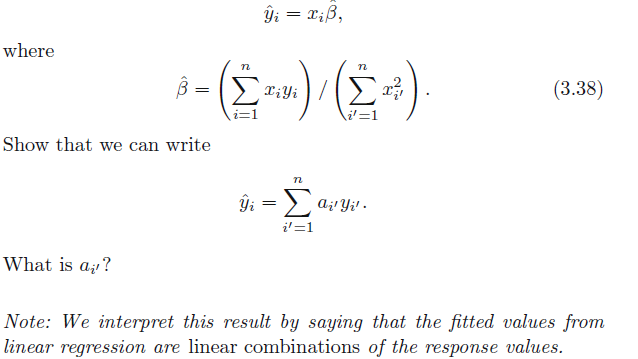
### Respuesta
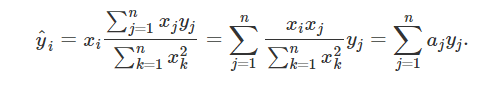

## 6. Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point (¯x, ¯y).

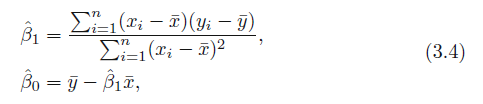

### Respuesta 

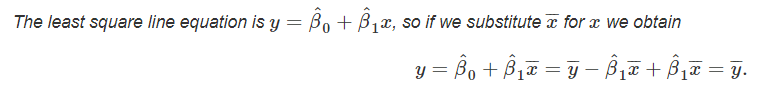


## 7. It is claimed in the text that in the case of simple linear regression of Y onto X, the R2 statistic (3.17) is equal to the square of the correlation between X and Y (3.18). Prove that this is the case. For simplicity, you may assume that ¯x = ¯y = 0.

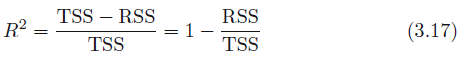
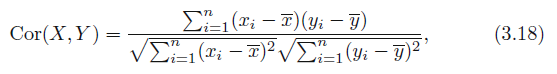

### Respuesta 

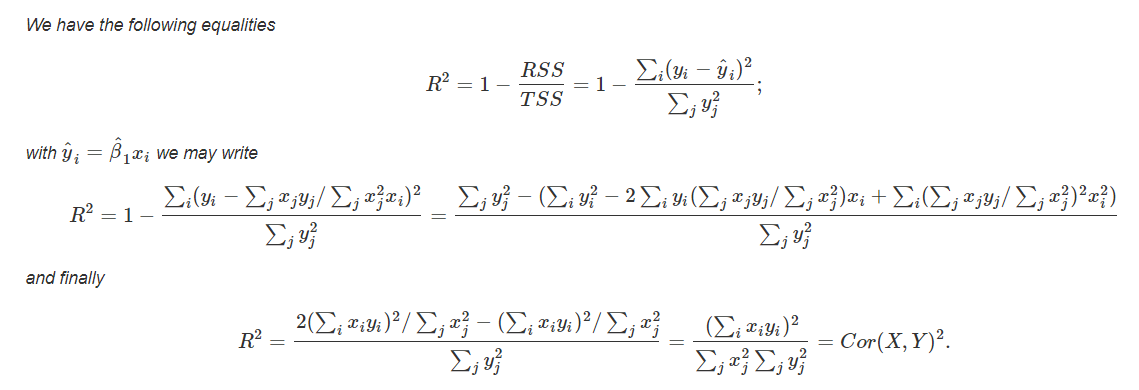